## Summary of boardwork:
### Types of Networks, definitions, and properties: Dir, Undir, Bipartite, Hypergraph, Trees, Planar, Cyclic, Acyclic
### Graph Connectivity: Connected comps, strongly, weakly
### Clustering Coeff
### Paths: Radius + Diameter
---

### NetworkX generating synthetic graphs
https://networkx.org/documentation/stable/reference/generators.html

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
n = 5  # 10 nodes

# Use seed for reproducibility
cycle_graph = nx.cycle_graph(n)

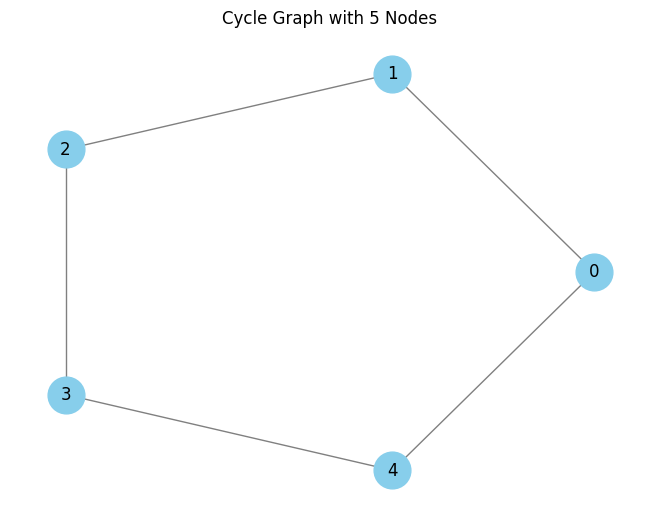

In [2]:
# Draw the graph
nx.draw_circular(cycle_graph, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f"Cycle Graph with {n} Nodes")
plt.show()

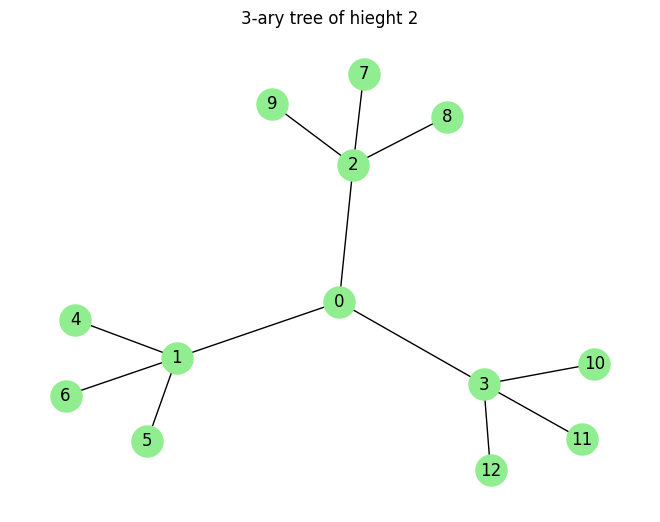

In [3]:
r = 3
h = 2
tree = nx.balanced_tree(r, h)  
nx.draw(tree, with_labels=True, node_color='lightgreen', node_size=500)
plt.title(f"{r}-ary tree of hieght {h}")
plt.show()

In [4]:
cycle = nx.find_cycle(cycle_graph)
print("Cycle found by find_cycle:", cycle)

Cycle found by find_cycle: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]


In [5]:
# What will happen?
cycle = nx.find_cycle(tree)

NetworkXNoCycle: No cycle found.

In [6]:
components = list(nx.connected_components(cycle_graph))
print("Connected Components:", components)

Connected Components: [{0, 1, 2, 3, 4}]


In [7]:
components = list(nx.connected_components(tree))
print("Connected Components:", components)

Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]


In [8]:
# Get the radius
radius = nx.radius(tree)
print("Radius:", radius)

# Get the center node(s) — these are the nodes that achieve the radius
center_nodes = nx.center(tree)
print("Center node(s):", center_nodes)

Radius: 2
Center node(s): [0]


### Clustering Coeff

In [9]:
import numpy as np
import pandas as pd
import tqdm as tqdm
HUMANNET_PATH = "../DATA/HumanNet-GSP.tsv"
HUMANNET = pd.read_csv(HUMANNET_PATH, sep="\t")
HUMANNET = HUMANNET[HUMANNET['Gene1'].notna()]
# Get the unique list of genes
genes = pd.unique(HUMANNET[['Gene1', 'Gene2']].values.ravel())

# Create a mapping of genes to indices for the adjacency matrix
gene_to_index = {gene: idx for idx, gene in enumerate(genes)}

# Initialize a directed adjacency matrix of zeros
adj_matrix = np.zeros((len(genes), len(genes)), dtype=int)

# Fill the adjacency matrix based on HumanNet edges (directed)
for _, row in tqdm.tqdm(HUMANNET.iterrows(), total=len(HUMANNET), desc="Processing rows"):
    i, j = gene_to_index[row["Gene1"]], gene_to_index[row["Gene2"]]
    adj_matrix[i, j] = 1  # Directed edge from Gene1 → Gene2


Processing rows: 100%|██████████| 260961/260961 [00:06<00:00, 38414.37it/s]


In [10]:
import networkx as nx
import tqdm

# Initialize a directed graph
G = nx.DiGraph()

# Add edges from DataFrame
for _, row in tqdm.tqdm(HUMANNET.iterrows(), total=len(HUMANNET), desc="Building Graph"):
    gene1 = row["Gene1"]
    gene2 = row["Gene2"]
    G.add_edge(gene1, gene2)


Building Graph: 100%|██████████| 260961/260961 [00:06<00:00, 42097.03it/s]


In [11]:
# Convert to undirected graph for clustering analysis
G_undirected = G.to_undirected()

# Individual node clustering coefficients
clustering_per_node = nx.clustering(G_undirected)

# Average clustering coefficient
avg_clustering = nx.average_clustering(G_undirected)

print("Average Clustering Coefficient:", avg_clustering)


Average Clustering Coefficient: 0.6485289244877791
